# Clase 1b: Lectura de archivos, funciones, fechas.

Lo que veremos en esta notebook:

- [x] Leer archivos txt, csv, xml
- [x] Listar archivos desde un directorio
- [x] Construir funciones básicas
- [x] Manejo básico de fechas, formato datetime.


Librerías a importar:
```python
from termcolor import colored
import numpy as np
import pandas as pd
import os
```

In [1]:
from termcolor import colored
import numpy as np
import pandas as pd
import os

# 1. Lectura de archivos

# 1.1. Archivos csv

Anteriormente vimos un ejemplo de como importar un _dataframe_ haciendo uso de la librería Pandas, pero esta no es la única que nos permite leer archivos almacenados en nuestro disco. Supongamos que nos interesa leer una matriz cualquiera de datos en formato csv o txt, utilicemos como ejemplo la _dataframe_ que leimos anteriormente:

```python
ruta = '../data/raw_data/'  # Establecemos la ruta a nuestro archivo
filename = os.path.join(ruta, 'personas.csv')
datos = np.genfromtxt(filename, skip_header=1, delimiter=',', dtype=int)
print(datos)

```

In [2]:
ruta = os.path.join(os.getcwd(), "raw_data")
filename = os.path.join(ruta, "personas.csv")
datos = np.genfromtxt(filename, skip_header=1, delimiter=',', dtype=int)
print(datos)

[[140070101        14         7 ...        40        28        68]
 [140070102        14         7 ...       261       233       494]
 [140070103        14         7 ...       123        96       219]
 ...
 [141821310        14       182 ...       242       249       491]
 [141821311        14       182 ...       417       417       834]
 [141821312        14       182 ...       420       434       854]]


En este caso, obtendríamos únicamente una matriz de datos que podríamos operar con facilidad. Sin embargo, no tendríamos etiquetas para saber cual columna estamos operando. Como vimos anteriormente, la librería Pandas soluciona este inconveniente.
```python
archivo = pd.read_csv(filename)
print(archivo)
```

In [3]:
archivo = pd.read_csv(filename)
print(archivo)

         codigo  prov  dpto  frac  rad  varon  mujer  total
0     140070101    14     7     1    1     40     28     68
1     140070102    14     7     1    2    261    233    494
2     140070103    14     7     1    3    123     96    219
3     140070104    14     7     1    4     45     32     77
4     140070105    14     7     1    5    137    131    268
...         ...   ...   ...   ...  ...    ...    ...    ...
4747  141821308    14   182    13    8    229    225    454
4748  141821309    14   182    13    9    222    240    462
4749  141821310    14   182    13   10    242    249    491
4750  141821311    14   182    13   11    417    417    834
4751  141821312    14   182    13   12    420    434    854

[4752 rows x 8 columns]


Incluso podemos leer únicamente las columnas que nos interesan. En este caso, las columnas "codigo", "varon" y "mujer" contienen los datos necesarios para generar las demás columnas como vimos en la _notebook_ anterior:

```python
df = pd.read_csv(filename, usecols=['codigo', 'varon', 'mujer'])

print(df.keys())
```

In [4]:
df = pd.read_csv(filename, usecols=['codigo', 'varon', 'mujer'])

print(df.keys())

Index(['codigo', 'varon', 'mujer'], dtype='object')


## 1.2. Archivos txt
En el caso anterior, seleccionamos una serie de columnas de interés a partir de un _csv_ disponible en la web. Ahora, ¿qué pasa si nuestro archivo no se encuentra estructurado de una forma adecuada para la librería?

Esto es muy común en los archivos de texto plano. Veamos por ejemplo qué pasa con un archivo de metadatos de una imagen proveniente del satélite Landsat 8 disponible en nuestra carpeta de datos:

```python
# Probemos con numpy:
ruta = '../data/raw_data/'
filename = f'{ruta}LC08_L1TP_226084_20200313_20200314_01_RT_MTL.txt'
metadatos = np.genfromtxt(filename)
print(metadatos)
```

In [5]:
ruta = "./raw_data/"
filename = f'{ruta}LC08_L1TP_226084_20200313_20200314_01_RT_MTL.txt'
metadatos = np.genfromtxt(filename)
print(metadatos)

ValueError: Some errors were detected !
    Line #3 (got 9 columns instead of 3)
    Line #225 (got 1 columns instead of 3)

In [10]:
# Generalmente, el formato manejado por estos archivos es del tipo clave valor, por lo que es
# importante usar la estructura de datos de "Diccionario"

metadata = {}

with open(filename, "r") as file:
    for line in file:
        line = line.strip()
        if "=" in line:
            key, value = line.split("=", 1)
            metadata[key.strip()] = value.strip().strip('"')

# Ver un ejemplo
for k, v in list(metadata.items())[:5]:
    print(f"{k}: {v}")

GROUP: PROJECTION_PARAMETERS
ORIGIN: Image courtesy of the U.S. Geological Survey
REQUEST_ID: 0502003141438_00016
LANDSAT_SCENE_ID: LC82260842020073LGN00
LANDSAT_PRODUCT_ID: LC08_L1TP_226084_20200313_20200314_01_RT


```python
# Probemos con pandas:
metadatos = pd.read_csv(filename, delimiter='=')
print(metadatos)
```

In [7]:
metadatos = pd.read_csv(filename, delimiter='=')
print(metadatos)

                      GROUP                                  L1_METADATA_FILE
0                     GROUP                                METADATA_FILE_INFO
1                    ORIGIN    "Image courtesy of the U.S. Geological Survey"
2                REQUEST_ID                             "0502003141438_00016"
3          LANDSAT_SCENE_ID                           "LC82260842020073LGN00"
4        LANDSAT_PRODUCT_ID        "LC08_L1TP_226084_20200313_20200314_01_RT"
..                       ...                                              ...
219             ORIENTATION                                        "NORTH_UP"
220       RESAMPLING_OPTION                               "CUBIC_CONVOLUTION"
221               END_GROUP                             PROJECTION_PARAMETERS
222               END_GROUP                                  L1_METADATA_FILE
223                      END                                              NaN

[224 rows x 2 columns]


Lo anterior, aunque en este caso de alguna manera podría servir, no es lo que se esperaría cuando desarrollamos scripts de automatización, de hecho, existen archivos de metadatos donde los nombres de variables se repiten en diferentes subgrupos, lo cual generaría inconvenientes al momento de leer nuestras variables. 

No siempre vamos a poder manejar la estructura de los archivos de entrada. Archivos como los metadatos de las imágenes satelitales, vienen con estructuras definidas por cada agencia espacial y depende de nosotros generar _scripts_ que nos permitan acceder adecuadamente a ellos haciendo uso de librerías básicas.

Python permite, mediante su función _open_, leer y guardar diferentes tipos de archivos. Veamos un ejemplo de como leer adecuadamente el archivo anterior:

```python
with open(filename, 'r') as f:
    archi = f.readlines()

archi
```

In [8]:
with open(filename, 'r') as f:
    archi = f.readlines()

archi

['GROUP = L1_METADATA_FILE\n',
 '  GROUP = METADATA_FILE_INFO\n',
 '    ORIGIN = "Image courtesy of the U.S. Geological Survey"\n',
 '    REQUEST_ID = "0502003141438_00016"\n',
 '    LANDSAT_SCENE_ID = "LC82260842020073LGN00"\n',
 '    LANDSAT_PRODUCT_ID = "LC08_L1TP_226084_20200313_20200314_01_RT"\n',
 '    COLLECTION_NUMBER = 01\n',
 '    FILE_DATE = 2020-03-14T21:41:13Z\n',
 '    STATION_ID = "LGN"\n',
 '    PROCESSING_SOFTWARE_VERSION = "LPGS_13.1.0"\n',
 '  END_GROUP = METADATA_FILE_INFO\n',
 '  GROUP = PRODUCT_METADATA\n',
 '    DATA_TYPE = "L1TP"\n',
 '    COLLECTION_CATEGORY = "RT"\n',
 '    ELEVATION_SOURCE = "GLS2000"\n',
 '    OUTPUT_FORMAT = "GEOTIFF"\n',
 '    SPACECRAFT_ID = "LANDSAT_8"\n',
 '    SENSOR_ID = "OLI_TIRS"\n',
 '    WRS_PATH = 226\n',
 '    WRS_ROW = 84\n',
 '    NADIR_OFFNADIR = "NADIR"\n',
 '    TARGET_WRS_PATH = 226\n',
 '    TARGET_WRS_ROW = 84\n',
 '    DATE_ACQUIRED = 2020-03-13\n',
 '    SCENE_CENTER_TIME = "13:50:41.0900869Z"\n',
 '    CORNER_UL_LAT_P

Como vemos, la instrucción anterior carga el archivo y extrae las líneas, almacenando cada una de ellas en una lista. Cada línea tiene una serie de espacios, que no son de nuestro interés, así como con parámetro '\n' que indica un salto de espacio. Estos elementos no son útiles y pueden generar errores al momento de utilizar los parámetros extraidos, así que vamos a eliminarlos:

```python
# Eliminamos los espacios y los saltos de línea
archi = [i.strip(' \n') for i in archi]
print(archi)
```

In [9]:
archi = [i.strip(' \n') for i in archi]
print(archi)

['GROUP = L1_METADATA_FILE', 'GROUP = METADATA_FILE_INFO', 'ORIGIN = "Image courtesy of the U.S. Geological Survey"', 'REQUEST_ID = "0502003141438_00016"', 'LANDSAT_SCENE_ID = "LC82260842020073LGN00"', 'LANDSAT_PRODUCT_ID = "LC08_L1TP_226084_20200313_20200314_01_RT"', 'COLLECTION_NUMBER = 01', 'FILE_DATE = 2020-03-14T21:41:13Z', 'STATION_ID = "LGN"', 'PROCESSING_SOFTWARE_VERSION = "LPGS_13.1.0"', 'END_GROUP = METADATA_FILE_INFO', 'GROUP = PRODUCT_METADATA', 'DATA_TYPE = "L1TP"', 'COLLECTION_CATEGORY = "RT"', 'ELEVATION_SOURCE = "GLS2000"', 'OUTPUT_FORMAT = "GEOTIFF"', 'SPACECRAFT_ID = "LANDSAT_8"', 'SENSOR_ID = "OLI_TIRS"', 'WRS_PATH = 226', 'WRS_ROW = 84', 'NADIR_OFFNADIR = "NADIR"', 'TARGET_WRS_PATH = 226', 'TARGET_WRS_ROW = 84', 'DATE_ACQUIRED = 2020-03-13', 'SCENE_CENTER_TIME = "13:50:41.0900869Z"', 'CORNER_UL_LAT_PRODUCT = -33.56016', 'CORNER_UL_LON_PRODUCT = -61.57366', 'CORNER_UR_LAT_PRODUCT = -33.50460', 'CORNER_UR_LON_PRODUCT = -59.02733', 'CORNER_LL_LAT_PRODUCT = -35.71026', 

Si revisamos cada uno de los elementos de la lista, a excepción del último, estos contienen el nombre de una variable seguido por su valor. Esto ya es conocido de cuando trabajamos con diccionarios. A su vez, si revisamos el txt original podemos ver que tenemos un grupo que engloba todos nuestros datos y en este, tenemos subgrupos donde cada subgrupo tiene un comienzo indicado por la palabra _GROUP_ y un final, indicado por la palabra _END_GROUP_:

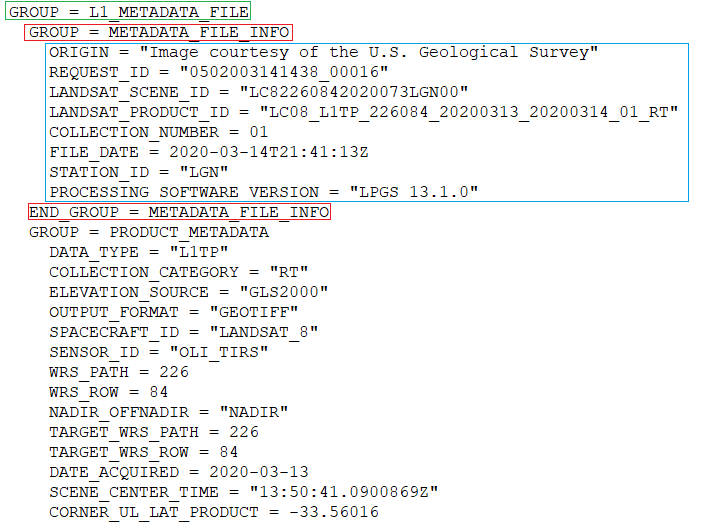


 Teniendo esta estructura vamos entonces a construir nuestro diccionario:
 
```python
group1 = archi[0].split(' = ')[1]  # Nombre del grupo principal
diccionario = {group1 :{}}

# A continuación iteramos desde la segunda hasta la penúltima posición
# esto para evitar tomar solo los subgrupos y evitar el END final
# que nos causaría un error en el split(' = ')

for i in archi[1:-1]:
    key, val = i.split(' = ')
    if key == 'GROUP':
        subgrupo = val
        diccionario[group1][subgrupo] = {}
    elif key != 'END_GROUP':
        diccionario[group1][subgrupo][key] = val.replace('"', '')
 ```


In [11]:
group1 = archi[0].split(' = ')[1]  # Nombre del grupo principal
diccionario = {group1 :{}}

for i in archi[1:-1]:
    key, val = i.split(' = ')
    if key == 'GROUP':
        subgrupo = val
        diccionario[group1][subgrupo] = {}
    elif key != 'END_GROUP':
        diccionario[group1][subgrupo][key] = val.replace('"', '')

Veamos qué grupos se crearon consultando mediante el método _keys()_ de nuestro diccionario:
```python
print(diccionario['L1_METADATA_FILE'].keys())
```

In [12]:
print(diccionario['L1_METADATA_FILE'].keys())

dict_keys(['METADATA_FILE_INFO', 'PRODUCT_METADATA', 'IMAGE_ATTRIBUTES', 'MIN_MAX_RADIANCE', 'MIN_MAX_REFLECTANCE', 'MIN_MAX_PIXEL_VALUE', 'RADIOMETRIC_RESCALING', 'TIRS_THERMAL_CONSTANTS', 'PROJECTION_PARAMETERS'])


Podríamos extraer uno de los grupos que nos interese y convertirlo en una estructura Pandas Series:

```python
subgrupo = diccionario['L1_METADATA_FILE']['PROJECTION_PARAMETERS']

print(colored('\nSubgrupo PROJECTION_PARAMETERS visto como diccionario:', 'blue'))
print(subgrupo)

prj_params = pd.Series(subgrupo)
print(colored('\nSubgrupo PROJECTION_PARAMETERS visto como estructura Pandas Series:', 'blue'))
print(prj_params)
```

In [13]:
subgrupo = diccionario['L1_METADATA_FILE']['PROJECTION_PARAMETERS']

print(colored('\nSubgrupo PROJECTION_PARAMETERS visto como diccionario:', 'blue'))
print(subgrupo)

prj_params = pd.Series(subgrupo)
print(colored('\nSubgrupo PROJECTION_PARAMETERS visto como estructura Pandas Series:', 'blue'))
print(prj_params)


Subgrupo PROJECTION_PARAMETERS visto como diccionario:
{'MAP_PROJECTION': 'UTM', 'DATUM': 'WGS84', 'ELLIPSOID': 'WGS84', 'UTM_ZONE': '20', 'GRID_CELL_SIZE_PANCHROMATIC': '15.00', 'GRID_CELL_SIZE_REFLECTIVE': '30.00', 'GRID_CELL_SIZE_THERMAL': '30.00', 'ORIENTATION': 'NORTH_UP', 'RESAMPLING_OPTION': 'CUBIC_CONVOLUTION'}

Subgrupo PROJECTION_PARAMETERS visto como estructura Pandas Series:
MAP_PROJECTION                               UTM
DATUM                                      WGS84
ELLIPSOID                                  WGS84
UTM_ZONE                                      20
GRID_CELL_SIZE_PANCHROMATIC                15.00
GRID_CELL_SIZE_REFLECTIVE                  30.00
GRID_CELL_SIZE_THERMAL                     30.00
ORIENTATION                             NORTH_UP
RESAMPLING_OPTION              CUBIC_CONVOLUTION
dtype: object


# 1.3. Los archivos XML

XML quiere decir _Extensible Markup Language_, que se podría traducir como Lenguaje de Marcas Extensibles; lo cual, si no conocemos de antes este tipo de archivos, no nos dice mucho.

Los archivos XML se componen de etiquetas o marcadores que nos aportan información de distinto tipo. Estas etiquetas o marcadores a su vez pueden estar anidados en varios niveles, dando una idea de jerarquía. Esto es muy util a la hora de organizar y compartir la información.

Un ejemplo muy simple de estructura XML sería la siguiente:
```xml
<?xml version="1.0" encoding="UTF-8"?>
   <note>
       <to>Tove</to>
       <from>Jani</from>
       <heading>Reminder</heading>
       <body>Don't forget me this weekend!</body>
   </note>
```

Al inicio de un archivo de este tipo casi siempre encontrarán una primera línea que en inglés se llama _prolog_:
```xml
<?xml version="1.0" encoding="UTF-8"?>
```

En esta línea se especifica cuál es la versión de XML que se está usando, y cuál es la codificación de caracteres elegida. Esto es muy importante, sobre todo si dentro del contenido se hará uso de caracteres especiales.

Luego se desarrolla el contenido del archivo. Siempre debe existir un único elemento o nodo **raíz** que contiene a los demás. En este caso la raíz es la entrada **note** y sus elementos _hijos_ son los atributos _to , from, heading, body_.

Todo elemento de un XML, ya sea un nodo raiz, sub-nodo o atributo simple, debe abrirse y cerrarse explícitamente. Para ello se usan los símbolos **<>** y **<\/>** respectivamente. En nuestro ejemplo, abrimos el nodo raíz con **```<note>```** y lo cerramos con **```</note>```**. De manera similar se hace con el resto de los atributos.

Más referencias sobre el uso y sintaxis de archivos XML se pueden consultar [aquí](https://www.w3schools.com/xml/xml_syntax.asp). Nosotros no nos dedicaremos a escribir archivos XML en esta clase, sino solo a leerlos.

Veamos cómo abrir y leer con Python un archivo XML simple; luego veremos cómo hacerlo con ejempos más complejos. En la carpeta _Data_ hemos dejado colgado un archivo que se llama **ejemplo_xml.xml**, que es el mismo del ejemplo mostrado en la celda anterior. Para esto utilizaremos la librería _xml_. Se puede consultar su documentación en el siguiente [enlace](https://docs.python.org/3/library/xml.etree.elementtree.html).

**Tip**: Algunos editores de texto avanzados como [Notepad++](https://notepad-plus-plus.org/downloads/) permiten abrir los archivos XML y expandir/contraer los nodos para ver más claramente cómo es la estructura y jerarquía del documento.

```python
from xml.etree import ElementTree as ET

f = open('../data/raw_data/ejemplo_xml.xml')
tree = ET.parse(f)
root = tree.getroot()

# Siempre cerrar el archivo una vez que no lo usamos más
f.close()
print(root)

# Alternativa:
# with open('../data/raw_data/ejemplo_xml.xml') as f:
#     tree = ET.parse(f)
#     root = tree.getroot()

# print(root)
```

In [15]:
from xml.etree import ElementTree as ET

f = open('./raw_data/ejemplo_xml.xml')
tree = ET.parse(f)
root = tree.getroot()

# Siempre cerrar el archivo una vez que no lo usamos más
f.close()
print(root)

<Element 'note' at 0x000001BFDBC2BCC0>


Ya tenemos a la raiz del XML "capturada" en una variable que hemos llamado _root_. No es exactamento un texto, esta corresponde a un objeto de la clase ```xml.etree.ElementTree.Element```: por eso cuando imprimimos su contenido nos devuelve ```<Element 'note' at 0x7fda0804b6d0>```:

```python
print(type(root))
```

In [16]:
print(type(root))

<class 'xml.etree.ElementTree.Element'>


Para desmenuzarla un poco más debemos operar con el código:

```python
for item in root:
    print(f'{item.tag}: {item.text}')
```

In [17]:
for item in root:
    print(f'{item.tag}: {item.text}')

to: Tove
from: Jani
heading: Reminder
body: Don't forget me this weekend!


Con _.text_ obtenemos como texto el contenido de cada uno de los nodos hijo, así como con _.tag_ podemos obtener el nombre del marcador. Como sabemos que cada uno de ellos no tiene sub-nodos, obtendremos directamente el contenido del atributo. No obstante, pensando en estructuras más anidadas, podríamos identificarlos por su etiqueta y guardar cada uno a una variable para luego trabajar con ellas:

```python
with open('../data/raw_data/ejemplo_xml_2.xml') as f:
    tree = ET.parse(f)

    root = tree.getroot()

for item in root:
    print(f'{item.tag}: {item.attrib["name"]}')
```

In [18]:
with open('./raw_data/ejemplo_xml_2.xml') as f:
    
    tree = ET.parse(f)

    root = tree.getroot()

for item in root:
    print(f'{item.tag}: {item.attrib["name"]}')

country: Liechtenstein
country: Singapore
country: Panama


Ahora, vamos a acceder a los nodos hijos del subnodo que corresponde a Panamá y extraer sus valores:

```python
panama_vals = list()

for item in root:
    if item.attrib['name'] == 'Panama':
        for subitem in item:
            print(f'{subitem.tag}: {subitem.text}')
            panama_vals.append(subitem.text)

print(panama_vals)
# Alternativamente, podemos usar compresión de listas,
# aunque, esto no es muy legible:
panama_vals = [subitem.text for subitem in item for item in root if item.attrib['name'] == 'Panama']
print(panama_vals)
```

In [19]:
panama_vals = list()

for item in root:
    if item.attrib['name'] == 'Panama':
        for subitem in item:
            print(f'{subitem.tag}: {subitem.text}')
            panama_vals.append(subitem.text)

print(panama_vals)
# Alternativamente, podemos usar compresión de listas,
# aunque, esto no es muy legible:
panama_vals = [subitem.text for subitem in item for item in root if item.attrib['name'] == 'Panama']
print(panama_vals)

rank: 68
year: 2011
gdppc: 13600
neighbor: None
neighbor: None
['68', '2011', '13600', None, None]
['68', '2011', '13600', None, None]


### Ejercicio 1.1 (opcional):
Leer el archivo _/data/raw_data/ejemplo_xml_2.xml_ como un diccionario de datos que contenga 3 keys. Cada key va a ser el nombre del país y cada valor de esa key va a ser un dicionario con la llave:valor de los tags rank, year y gdppc, como se muestra a continuación:

```
{'Liechtenstein': {'rank': '1', 'year': '2008', 'gdppc': '141100'}, 'Singapore': {'rank': '4', 'year': '2011', 'gdppc': '59900'}, 'Panama': {'rank': '68', 'year': '2011', 'gdppc': '13600'}}
```

In [46]:
# Ejercicio resuelto
# Versión 1
xml = ET.parse("./raw_data/ejemplo_xml_2.xml")

root_element = xml.getroot()

diccionario = {}

for child in root_element:

    diccionario[child.attrib["name"]] = {}

    for subchild in child:

        if subchild.text:

            diccionario[child.attrib["name"]][subchild.tag] = subchild.text

print(diccionario)

{'Liechtenstein': {'rank': '1', 'year': '2008', 'gdppc': '141100'}, 'Singapore': {'rank': '4', 'year': '2011', 'gdppc': '59900'}, 'Panama': {'rank': '68', 'year': '2011', 'gdppc': '13600'}}


In [48]:
import xml.etree.ElementTree as ET

tree = ET.parse("./raw_data/ejemplo_xml_2.xml")
root = tree.getroot()

diccionario = {
    child.attrib.get("name"): {
        sub.tag: sub.text for sub in child if sub.text
    }
    for child in root if "name" in child.attrib
}

print(diccionario)

{'Liechtenstein': {'rank': '1', 'year': '2008', 'gdppc': '141100'}, 'Singapore': {'rank': '4', 'year': '2011', 'gdppc': '59900'}, 'Panama': {'rank': '68', 'year': '2011', 'gdppc': '13600'}}


# 1.3. Los archivos JSON

El formato de archivos JSON (JavaScript Object Notation), se utiliza ampliamente para estructurar datos y permitir su intercambio principalmente con plataformas web. Es utilizado por diversas API (Application Programming Interface) que suministran datos geoespaciales. Un ejemplo claro lo podemos consultar en la documentación de la API de [AppEEARS](https://appeears.earthdatacloud.nasa.gov/api/?python#formatting), la cual permite la descarga de diversos productos MODIS.

Estos archivos son basados en texto, es decir que se pueden leer y escribir con cualquier editor que tengamos definiendo su extensión como `.json`, sin embargo, debemos tener en cuenta que a diferencia de python, los _strings_ que definamos deben ir encerrados en comillas dobles(`"`), json no admite comilla simple (`'`). En python, su manejo es muy similar a los diccionarios por lo que permite almacenar diferentes tipos de estructuras básicas como las que ya hemos visto y su lectura/escritura se realiza mediante la librería [json](https://docs.python.org/3/library/json.html). Veamos un ejemplo:

```python
import json

# Cargamos el archivo point_example.json que se encuentra en nuestra carpeta ../data/raw_data

with open('../data/raw_data/point_example.json') as src:
    data = json.load(src)

print(data)
```

In [51]:
import json

# Cargamos el archivo point_example.json que se encuentra en nuestra carpeta ../data/raw_data

with open('./raw_data/point_example.json') as src:
    data = json.load(src)

print(data)

{'params': {'dates': [{'endDate': '01-01-2020', 'recurring': False, 'startDate': '01-01-2015', 'yearRange': [2005, 2015]}], 'layers': [{'layer': '_500m_16_days_EVI', 'product': 'MOD13A1.061'}, {'layer': 'LST_Day_1km', 'product': 'MOD11A1.061'}], 'output': {'format': {'type': 'geotiff'}}, 'coordinates': [{'id': '100', 'category': 'category1', 'latitude': 34.4544983, 'longitude': -119.8659973}, {'id': '101', 'category': 'category2', 'latitude': 34.4714012, 'longitude': -119.9179993}, {'id': '102', 'category': 'category1', 'latitude': 34.4856987, 'longitude': -119.9169998}, {'id': '103', 'category': 'category2', 'latitude': 34.4805984, 'longitude': -119.9000015}, {'id': '104', 'category': 'category1', 'latitude': 34.4976006, 'longitude': -119.9229965}, {'id': '105', 'category': 'category2', 'latitude': 34.4842987, 'longitude': -119.8669968}]}, 'task_name': 'Point Example', 'task_type': 'point'}


Adicionalmente, es posible que al realizar una consulta web o leer un archivo, tengamos nuestro objeto como un string. En este caso es posible convertirlo a json de la siguiente manera:

```python
response = '''{"SRTMGL1_DEM": {"AddOffset": "", "Available": true, "DataType": "int16", "Description": "Elevation", "Dimensions": ["time", "lat", "lon"], "FillValue": -32768, "IsQA": false, "Layer": "SRTMGL1_DEM", "OrigDataType": "int16", "OrigValidMax": 32767, "OrigValidMin": -32767, "QualityLayers": "['SRTMGL1_NUM']", "QualityProductAndVersion": "SRTMGL1_NUMNC.003", "ScaleFactor": "", "Units": "Meters", "ValidMax": 32767, "ValidMin": -32767, "XSize": 3601, "YSize": 3601}}'''

response = json.loads(response)
```

In [53]:
response = '''{"SRTMGL1_DEM": {"AddOffset": "", "Available": true, "DataType": "int16", "Description": "Elevation", "Dimensions": ["time", "lat", "lon"], "FillValue": -32768, "IsQA": false, "Layer": "SRTMGL1_DEM", "OrigDataType": "int16", "OrigValidMax": 32767, "OrigValidMin": -32767, "QualityLayers": "['SRTMGL1_NUM']", "QualityProductAndVersion": "SRTMGL1_NUMNC.003", "ScaleFactor": "", "Units": "Meters", "ValidMax": 32767, "ValidMin": -32767, "XSize": 3601, "YSize": 3601}}'''

response = json.loads(response)

print(response)

{'SRTMGL1_DEM': {'AddOffset': '', 'Available': True, 'DataType': 'int16', 'Description': 'Elevation', 'Dimensions': ['time', 'lat', 'lon'], 'FillValue': -32768, 'IsQA': False, 'Layer': 'SRTMGL1_DEM', 'OrigDataType': 'int16', 'OrigValidMax': 32767, 'OrigValidMin': -32767, 'QualityLayers': "['SRTMGL1_NUM']", 'QualityProductAndVersion': 'SRTMGL1_NUMNC.003', 'ScaleFactor': '', 'Units': 'Meters', 'ValidMax': 32767, 'ValidMin': -32767, 'XSize': 3601, 'YSize': 3601}}


Finalmente, es posible guardar nuestro objeto haciendo uso de la función `dump` de la librería, para lo cual necesitamos crear un archivo y volcar la información en el:

```python
with open('../data/out/respuesta_json.json', 'w') as dst:
    json.dump(response, dst, indent=4)

```


In [55]:
folder = './out'
file_path = os.path.join(folder, 'respuesta_json.json')

if not os.path.exists(folder):
    os.makedirs(folder)

with open(file_path, 'w') as dst:
    json.dump(response, dst, indent=4)

Para conocer más sobre este formato, puede consultar el siguiente [enlace](https://realpython.com/python-json/).

# 2. Funciones
Las funciones en un lenguaje de programación, son partes de código que encapsulan un conjunto de instrucciones, facilitando su uso y permitiendo su reutilización, tanto a lo largo del nuestro programa, como por programas externos. Las funciones se componen de las siguientes partes:

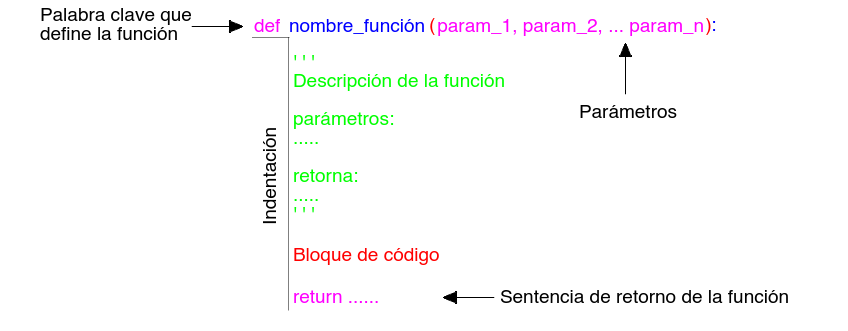

```python
def suma(a, b):
    '''
    Esta función devuelve la suma de dos números enteros a y b

    parámetros:
    a = número entero
    b = número entero

    retorna:
    suma de a y b
    '''

    if isinstance(a, int) and isinstance(b, int):
        res = a + b
    else:
        res = None
        print(colored(f'\n{a} y {b} deben ser números enteros.', 'red'))

    return res
```

In [56]:
def suma(a, b):
    '''
    Esta función devuelve la suma de dos números enteros a y b

    parámetros:
    a = número entero
    b = número entero

    retorna:
    suma de a y b
    '''

    if isinstance(a, int) and isinstance(b, int):
        res = a + b
    else:
        res = None
        print(colored(f'\n{a} y {b} deben ser números enteros.', 'red'))

    return res

## Cómo llamamos una función?

Una función se llama mediante su nombre seguido por paréntesis y, adentro de ellos, los parámetros necesarios para su ejecución:

```python
v1 = 5
v2 = -10
print(colored(f'La suma de {v1} y {v2} es: ', 'blue'), suma(v1, v2))

v1 = '5'
v2 = -10
print(colored(f'La suma de "{v1}" y {v2} es: ', 'blue'), suma(v1, v2))
```

In [57]:
v1 = 5
v2 = -10
print(colored(f'La suma de {v1} y {v2} es: ', 'blue'), suma(v1, v2))

v1 = '5'
v2 = -10
print(colored(f'La suma de "{v1}" y {v2} es: ', 'blue'), suma(v1, v2))

La suma de 5 y -10 es:  -5

5 y -10 deben ser números enteros.
La suma de "5" y -10 es:  None


Una función puede tener además parámetros predefinidos que pueden o no ser establecidos cuando se realiza una llamada a la misma, por ejemplo:

```python
def raiz(a, b=2):
    '''
    Esta función devuelve la raiz b de un número entero a positivo.
    En caso de no definirse un valor para b, tomará por defecto 2.

    parámetros:
    a = número entero positivo
    b = número entero

    retorna:
    raiz b de a
    '''

    if isinstance(a, int) and isinstance(b, int) and a>=0:
        res = a**(1/b)
    elif isinstance(a, int) and a < 0:
        res = None
        print(colored(f'\n{a} debe ser un entero positivo.', 'red'))
    else:
        res = None
        print(colored(f'\n{a} y {b} deben ser números enteros.', 'red'))

    return res
```

In [58]:
def raiz(a, b=2):
    '''
    Esta función devuelve la raiz b de un número entero a positivo.
    En caso de no definirse un valor para b, tomará por defecto 2.

    parámetros:
    a = número entero positivo
    b = número entero

    retorna:
    raiz b de a
    '''

    if isinstance(a, int) and isinstance(b, int) and a>=0:
        res = a**(1/b)
    elif isinstance(a, int) and a < 0:
        res = None
        print(colored(f'\n{a} debe ser un entero positivo.', 'red'))
    else:
        res = None
        print(colored(f'\n{a} y {b} deben ser números enteros.', 'red'))

    return res

En el caso anterior, dado que b tiene por defecto valor 2, si necesitamos calcular una raíz cuadrada, no sería necesario definirlo:

```python
print(raiz(16))
print(raiz(-125, 3))
```

In [59]:
print(raiz(16))
print(raiz(-125, 3))

4.0

-125 debe ser un entero positivo.
None


Hasta ahora vimos como llamar funciones que creamos en el archivo que estamos trabajando, pero también es posible llamar funciones creadas en otros archivos. Las podemos importar a nuestro _script_ llamándolas como si fueran librerías. Veamos esto siguiendo los pasos a continuación:

- Crear un archivo llamado _funciones.py_ en nuestra carpeta _Clase01_. 
- Copiar las siguientes líneas en el encabezado del mismo:

```python
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
# ----------------------------------------------------------------------------
# Created By  :
# Created Date:
```
- Copiar la función _raiz_ creada anteriormente. Guardamos el archivo.
- Crear una celda en este documento, copiar lo siguiente y ejecutarla:

```python
import funciones as fn
```

- Ejecutar el siguiente comando en una nueva celda en esta _notebook_:

```python
help(fn.raiz)
```

- Calcular la raiz cuadrada de 256 como:

```python
print(fn.raiz(256))
```

Una forma alternativa sería:

```python
from funciones import raiz

print(raiz(256))
```


In [60]:
import funciones as fn

In [61]:
help(fn.raiz)

Help on function raiz in module funciones:

raiz(a, b=2)
    Esta función devuelve la raiz b de un número entero a positivo.
    En caso de no definirse un valor para b, tomará por defecto 2.
    
    parámetros:
    a = número entero positivo
    b = número entero
    
    retorna:
    raiz b de a



In [62]:
print(fn.raiz(256))

16.0


In [63]:
from funciones import raiz

print(raiz(256))

16.0


In [64]:
# Adicional
from funciones import *

print(raiz(256))

16.0


También es posible mover el archivo a una ruta diferente, pero en este caso deberíamos adicionar la ruta al listado de directorios de nuestro intérprete. Vamos a mover nuestro script _funciones.py_ al directorio raíz de las clases. Posteriormente, ejecutaremos las siguientes instrucciones:

- Crear una nueva celda y adicionar nuestra ruta al listado de directorios con la siguiente instrucción:

```python
import sys
sys.path.append('../')
```
- Importar nuestra librería y calcular la raíz cuadrada de 256:

```python
from funciones import raiz

print(raiz(256))
```
Este archivo lo deberán guardar y en el, escribir todas las funciones que se vayan creando a lo largo del curso, dado que las mismas serán utilizadas en clases posteriores.

In [65]:
from funciones import raiz

print(raiz(256))

16.0


### Ejercicio 2.1:

En el caso anterior, realizamos una función que dados dos valores enteros retorna su suma o una que calcula una raíz dada de un número. Estas funciones, como vimos podrían ser utilizadas a lo largo de un programa siempre que se quiera realizar la misma operación. Claramente, para una operación tan sencilla no resulta adecuado generar una función, pero en casos como la lectura de un archivo como los que vimos anteriormente, podría resultar de utilidad. Tomemos el código que lee los metadatos de nuestra imagen Landsat 8 y lo convertimos en una función llamada _read_l8_metadata()_ que retorne los parámetros del grupo _MIN_MAX_REFLECTANCE_ como objeto _pandas.Series_.

In [72]:
def read_l8_metadata(filepath):
    
    with open(filepath, "r") as f:
        
        archi = [line.strip() for line in f if line.strip()]

    group1 = archi[0].split(" = ")[1]
    diccionario = {group1: {}}

    subgrupo = None
    
    for i in archi[1:]:
        
        if " = " not in i:
            
            continue
            
        key, val = i.split(' = ', 1)
        
        val = val.replace('"', '')
        
        if key == "GROUP":
            
            subgrupo = val
            
            diccionario[group1][subgrupo] = {}
            
        elif key == "END_GROUP":
            
            subgrupo = None
            
        else:
            
            if subgrupo:
                
                diccionario[group1][subgrupo][key] = val

    min_max_reflectance = diccionario[group1].get("MIN_MAX_REFLECTANCE", {})
    
    for k, v in min_max_reflectance.items():
        
        try:
            
            if '.' in v or 'E' in v.upper():
                
                min_max_reflectance[k] = float(v)
                
            else:
                
                min_max_reflectance[k] = int(v)
                
        except ValueError:
            
            pass

    return pd.Series(min_max_reflectance)   

In [73]:
ruta = "./raw_data/"
filename = f'{ruta}LC08_L1TP_226084_20200313_20200314_01_RT_MTL.txt'

print(read_l8_metadata(filename))

REFLECTANCE_MAXIMUM_BAND_1    1.21070
REFLECTANCE_MINIMUM_BAND_1   -0.09998
REFLECTANCE_MAXIMUM_BAND_2    1.21070
REFLECTANCE_MINIMUM_BAND_2   -0.09998
REFLECTANCE_MAXIMUM_BAND_3    1.21070
REFLECTANCE_MINIMUM_BAND_3   -0.09998
REFLECTANCE_MAXIMUM_BAND_4    1.21070
REFLECTANCE_MINIMUM_BAND_4   -0.09998
REFLECTANCE_MAXIMUM_BAND_5    1.21070
REFLECTANCE_MINIMUM_BAND_5   -0.09998
REFLECTANCE_MAXIMUM_BAND_6    1.21070
REFLECTANCE_MINIMUM_BAND_6   -0.09998
REFLECTANCE_MAXIMUM_BAND_7    1.21070
REFLECTANCE_MINIMUM_BAND_7   -0.09998
REFLECTANCE_MAXIMUM_BAND_8    1.21070
REFLECTANCE_MINIMUM_BAND_8   -0.09998
REFLECTANCE_MAXIMUM_BAND_9    1.21070
REFLECTANCE_MINIMUM_BAND_9   -0.09998
dtype: float64


### Ejercicio 2.2 (opcional):

Modifique la función anterior para que el grupo sea una entrada de la misma, de este modo, la función deberá retornar un objeto pandas.Series con los elementos del grupo dado como entrada.

In [78]:
import pandas as pd

def read_l8_group_metadata(filepath, group_name="MIN_MAX_REFLECTANCE"):
    
    with open(filepath, "r") as f:
        archi = [line.strip() for line in f if line.strip()]
    
    group1 = archi[0].split(' = ')[1]
    diccionario = {group1: {}}
    
    subgrupo = None
    
    for i in archi[1:]:
        if " = " not in i:
            continue
        key, val = i.split(' = ', 1)
        val = val.replace('"', '')

        if key == "GROUP":
            subgrupo = val
            diccionario[group1][subgrupo] = {}
        elif key == "END_GROUP":
            subgrupo = None
        else:
            if subgrupo:
                diccionario[group1][subgrupo][key] = val
    
    grupo_dict = diccionario[group1].get(group_name)
    
    if grupo_dict is None:
        
        raise ValueError(f"Grupo '{group_name}' no encontrado en el archivo.")

    for k, v in grupo_dict.items():
        try:
            if "." in v or "E" in v.upper():
                grupo_dict[k] = float(v)
            else:
                grupo_dict[k] = int(v)
        except ValueError:
            pass

    return pd.Series(grupo_dict)

In [79]:
ruta = "./raw_data/"
filename = f'{ruta}LC08_L1TP_226084_20200313_20200314_01_RT_MTL.txt'

print(read_l8_group_metadata(filename, "TIRS_THERMAL_CONSTANTS"))

K1_CONSTANT_BAND_10     774.8853
K2_CONSTANT_BAND_10    1321.0789
K1_CONSTANT_BAND_11     480.8883
K2_CONSTANT_BAND_11    1201.1442
dtype: float64


### Ejercicio 2.3 (opcional):

Modifique la función anterior para que dada una lista, la función retorne los diccionarios de los subgrupos de esa lista.


In [82]:
def read_l8_groups_metadata(filepath, groups):
   
    with open(filepath, "r") as f:
        archi = [line.strip() for line in f if line.strip()]
    
    group1 = archi[0].split(' = ')[1]
    diccionario = {group1: {}}

    subgrupo = None
    for i in archi[1:]:
        if " = " not in i:
            continue
        key, val = i.split(" = ", 1)
        val = val.replace('"', '')

        if key == "GROUP":
            subgrupo = val
            diccionario[group1][subgrupo] = {}
        elif key == "END_GROUP":
            subgrupo = None
        else:
            if subgrupo:
                diccionario[group1][subgrupo][key] = val

    resultado = {}
    for g in groups:
        if g in diccionario[group1]:
            resultado[g] = diccionario[group1][g]
    
    return resultado

In [84]:
ruta = "./raw_data/"
filename = f'{ruta}LC08_L1TP_226084_20200313_20200314_01_RT_MTL.txt'

grupos = ["MIN_MAX_REFLECTANCE", "PRODUCT_METADATA"]

print(read_l8_groups_metadata(filename, grupos))

{'MIN_MAX_REFLECTANCE': {'REFLECTANCE_MAXIMUM_BAND_1': '1.210700', 'REFLECTANCE_MINIMUM_BAND_1': '-0.099980', 'REFLECTANCE_MAXIMUM_BAND_2': '1.210700', 'REFLECTANCE_MINIMUM_BAND_2': '-0.099980', 'REFLECTANCE_MAXIMUM_BAND_3': '1.210700', 'REFLECTANCE_MINIMUM_BAND_3': '-0.099980', 'REFLECTANCE_MAXIMUM_BAND_4': '1.210700', 'REFLECTANCE_MINIMUM_BAND_4': '-0.099980', 'REFLECTANCE_MAXIMUM_BAND_5': '1.210700', 'REFLECTANCE_MINIMUM_BAND_5': '-0.099980', 'REFLECTANCE_MAXIMUM_BAND_6': '1.210700', 'REFLECTANCE_MINIMUM_BAND_6': '-0.099980', 'REFLECTANCE_MAXIMUM_BAND_7': '1.210700', 'REFLECTANCE_MINIMUM_BAND_7': '-0.099980', 'REFLECTANCE_MAXIMUM_BAND_8': '1.210700', 'REFLECTANCE_MINIMUM_BAND_8': '-0.099980', 'REFLECTANCE_MAXIMUM_BAND_9': '1.210700', 'REFLECTANCE_MINIMUM_BAND_9': '-0.099980'}, 'PRODUCT_METADATA': {'DATA_TYPE': 'L1TP', 'COLLECTION_CATEGORY': 'RT', 'ELEVATION_SOURCE': 'GLS2000', 'OUTPUT_FORMAT': 'GEOTIFF', 'SPACECRAFT_ID': 'LANDSAT_8', 'SENSOR_ID': 'OLI_TIRS', 'WRS_PATH': '226', 'WRS_

# 3. Listar archivos

Es muy común que al procesar diferentes conjuntos de datos y realizar procesos automáticos sobre ellos, necesitemos realizar listados y extraer cierta información útil para nuestro trabajo. Python ofrece diversas librerías que nos permiten realizar este tipo de procesos, entre las que se encuentran librerías como [_os_](https://docs.python.org/3/library/os.html), [_glob_](https://docs.python.org/3/library/glob.html) y [pathlib](https://docs.python.org/3/library/pathlib.html). En este apartado haremos uso de la librería [_os_](https://docs.python.org/3/library/os.html). Particularmente veremos como extraer datos de interés a partir de los nombres de los archivos contenidos en una carpeta mediante la función _listdir_ (para conocer acerca de listados recursivos puede consultar el siguiente [enlace](https://www.tutorialspoint.com/python/os_walk.htm)):

```python
import os

path = '../data/raw_data/NDVI/'
ext = 'tif'

files = os.listdir(path)

# Filtrar únicamente los formatos de datos que me interesan
files_with_ext = [f for f in files if f.lower().endswith(ext.lower())]
files_with_ext.sort()  # Organizo en orden ascendente

print(colored(f'\nArchivos con extensión {ext} encontrados:', 'blue'))
print(files_with_ext)
```

In [85]:
import os

path = "./raw_data/NDVI/"
ext = 'tif'

files = os.listdir(path)

files_with_ext = [f for f in files if f.lower().endswith(ext.lower())]
files_with_ext.sort()

print(colored(f'\nArchivos con extensión {ext} encontrados:', 'blue'))
print(files_with_ext)


Archivos con extensión tif encontrados:
['MOD13Q1.006__250m_16_days_NDVI_doy2007001_aid0001.tif', 'MOD13Q1.006__250m_16_days_NDVI_doy2007017_aid0001.tif', 'MOD13Q1.006__250m_16_days_NDVI_doy2007033_aid0001.tif', 'MOD13Q1.006__250m_16_days_NDVI_doy2007049_aid0001.tif', 'MOD13Q1.006__250m_16_days_NDVI_doy2007065_aid0001.tif', 'MOD13Q1.006__250m_16_days_NDVI_doy2007081_aid0001.tif', 'MOD13Q1.006__250m_16_days_NDVI_doy2007097_aid0001.tif', 'MOD13Q1.006__250m_16_days_NDVI_doy2007113_aid0001.tif', 'MOD13Q1.006__250m_16_days_NDVI_doy2007129_aid0001.tif', 'MOD13Q1.006__250m_16_days_NDVI_doy2007145_aid0001.tif', 'MOD13Q1.006__250m_16_days_NDVI_doy2007161_aid0001.tif', 'MOD13Q1.006__250m_16_days_NDVI_doy2007177_aid0001.tif', 'MOD13Q1.006__250m_16_days_NDVI_doy2007193_aid0001.tif', 'MOD13Q1.006__250m_16_days_NDVI_doy2007209_aid0001.tif', 'MOD13Q1.006__250m_16_days_NDVI_doy2007225_aid0001.tif', 'MOD13Q1.006__250m_16_days_NDVI_doy2007241_aid0001.tif', 'MOD13Q1.006__250m_16_days_NDVI_doy2007257_aid

También es posible listar archivos que tenemos adentro de un _zip_. Para esto podemos hacer uso de librería "zipfile". Esta librería nos permite cargar un archivo comprimido en memoria mientras leemos su contenido:

```python
from zipfile import ZipFile  # Importamos el módulo ZipFile
import os

data_dir = '../data/raw_data/'
fn_zip = 'L1C_T21HUB_A017181_20181006T135109.zip'
zipfilename = data_dir + fn_zip

# El siguiente bloque realiza un listado recursivo
# de los archivos contenidos en nuestro .zip
with ZipFile(zipfilename, 'r') as zfile:
    lista = zfile.namelist()

lista
```

In [87]:
from zipfile import ZipFile
import os

data_dir = './raw_data/'
fn_zip = "L1C_T21HUB_A023044_20191120T135113.zip"
zipfilename = data_dir + fn_zip

# El siguiente bloque realiza un listado recursivo
# de los archivos contenidos en nuestro .zip
with ZipFile(zipfilename, 'r') as zfile:
    
    lista = zfile.namelist()

lista

['S2A_MSIL1C_20191120T135111_N0208_R024_T21HUB_20191120T152911.SAFE/INSPIRE.xml',
 'S2A_MSIL1C_20191120T135111_N0208_R024_T21HUB_20191120T152911.SAFE/rep_info/',
 'S2A_MSIL1C_20191120T135111_N0208_R024_T21HUB_20191120T152911.SAFE/rep_info/S2_User_Product_Level-1C_Metadata.xsd',
 'S2A_MSIL1C_20191120T135111_N0208_R024_T21HUB_20191120T152911.SAFE/HTML/',
 'S2A_MSIL1C_20191120T135111_N0208_R024_T21HUB_20191120T152911.SAFE/HTML/star_bg.jpg',
 'S2A_MSIL1C_20191120T135111_N0208_R024_T21HUB_20191120T152911.SAFE/HTML/banner_1.png',
 'S2A_MSIL1C_20191120T135111_N0208_R024_T21HUB_20191120T152911.SAFE/HTML/banner_2.png',
 'S2A_MSIL1C_20191120T135111_N0208_R024_T21HUB_20191120T152911.SAFE/HTML/UserProduct_index.html',
 'S2A_MSIL1C_20191120T135111_N0208_R024_T21HUB_20191120T152911.SAFE/HTML/UserProduct_index.xsl',
 'S2A_MSIL1C_20191120T135111_N0208_R024_T21HUB_20191120T152911.SAFE/HTML/banner_3.png',
 'S2A_MSIL1C_20191120T135111_N0208_R024_T21HUB_20191120T152911.SAFE/AUX_DATA/',
 'S2A_MSIL1C_201911

A partir de esto podríamos por ejemplo filtrar nuestro contenido. Vamos a extraer los nombres de los archivos con extensión "jp2" que hay en nuestro _zip_.

```python
lista = [os.path.basename(i) for i in lista if i.endswith('jp2')]

lista
```

In [88]:
lista = [os.path.basename(i) for i in lista if i.endswith("jp2")]

lista

['T21HUB_20191120T135111_PVI.jp2',
 'T21HUB_20191120T135111_B03.jp2',
 'T21HUB_20191120T135111_B12.jp2',
 'T21HUB_20191120T135111_B11.jp2',
 'T21HUB_20191120T135111_B02.jp2',
 'T21HUB_20191120T135111_B10.jp2',
 'T21HUB_20191120T135111_B05.jp2',
 'T21HUB_20191120T135111_B07.jp2',
 'T21HUB_20191120T135111_B09.jp2',
 'T21HUB_20191120T135111_B04.jp2',
 'T21HUB_20191120T135111_B8A.jp2',
 'T21HUB_20191120T135111_TCI.jp2',
 'T21HUB_20191120T135111_B06.jp2',
 'T21HUB_20191120T135111_B01.jp2',
 'T21HUB_20191120T135111_B08.jp2']

Más adelante vamos a ver cómo leer estos archivos, por ahora volvamos a nuestro primer listado y veamos el nombre de la primera imagen de NDVI:

```python
print(files_with_ext[0])
```

In [89]:
print(files_with_ext[0])

MOD13Q1.006__250m_16_days_NDVI_doy2007001_aid0001.tif


Como vemos, el nombre del archivo anterior nos da información importante sobre el mismo. Por ahora no vamos a entrar en detalles, únicamente nos centraremos en su fecha. Veamos como extraerla:

```python
print(colored('\nDivido el string haciendo uso de la palabra "doy":', 'blue'))
split_str = files_with_ext[0].split('doy')
print(split_str)
```

Me quedo con el lado derecho del string, es decir, el elemento 1 de mi lista:

```python
print(colored('\nDivido mi nuevo string utilizando el guión bajo "_":', 'blue'))
split_str2 = split_str[1].split("_")
print(split_str2)
```

Extraigo la fecha:

```python
print(colored('\nMe quedo con mi elemento 0 que corresponde a la fecha de la imagen:', 'blue'))
fecha = split_str2[0]
print(fecha)
```


In [90]:
print(colored('\nDivido el string haciendo uso de la palabra "doy":', 'blue'))
split_str = files_with_ext[0].split('doy')
print(split_str)


Divido el string haciendo uso de la palabra "doy":
['MOD13Q1.006__250m_16_days_NDVI_', '2007001_aid0001.tif']


In [91]:
print(colored('\nDivido mi nuevo string utilizando el guión bajo "_":', 'blue'))
split_str2 = split_str[1].split("_")
print(split_str2)


Divido mi nuevo string utilizando el guión bajo "_":
['2007001', 'aid0001.tif']


In [92]:
print(colored('\nMe quedo con mi elemento 0 que corresponde a la fecha de la imagen:', 'blue'))
fecha = split_str2[0]
print(fecha)


Me quedo con mi elemento 0 que corresponde a la fecha de la imagen:
2007001


### Ejercicio 3.1 (opcional)
Extraer un listado con las fechas para todas las imágenes de la lista:

In [120]:
from datetime import datetime

class GetImage:

    def __init__(self, list_img):

        self.list_img = list_img

    def get_dates(self):

        listado = []

        for l in self.list_img:

            split_str = l.split("_")[1]

            split_str2 = split_str.split("T")[0]

            fecha_str = split_str2

            listado.append(datetime.strptime(fecha_str, "%Y%m%d").date())

        return listado    

In [121]:
print(GetImage(lista).get_dates())

[datetime.date(2019, 11, 20), datetime.date(2019, 11, 20), datetime.date(2019, 11, 20), datetime.date(2019, 11, 20), datetime.date(2019, 11, 20), datetime.date(2019, 11, 20), datetime.date(2019, 11, 20), datetime.date(2019, 11, 20), datetime.date(2019, 11, 20), datetime.date(2019, 11, 20), datetime.date(2019, 11, 20), datetime.date(2019, 11, 20), datetime.date(2019, 11, 20), datetime.date(2019, 11, 20), datetime.date(2019, 11, 20)]


# 4. Formato datetime

Python cuenta con un tipo de objeto especial que permite manejar con facilidad fechas (_datetime_), por medio de operaciones básicas como restas, comparaciones, suma de días, extracción de parámetros como año, mes o día, etc. Esto es especialmente útil cuando trabajamos por ejemplo con series temporales, dado resulta de mucha utilidad conocer el espaciamiento entre los datos, realizar selecciones por intervalos de tiempo (semanal, mensual, diario, etc.), entre otros. 

Veamos cómo a partir de las fechas extraídas anteriormente podemos obtener este tipo de objetos, utilizando para este objetivo la librería [_datetime_](https://docs.python.org/3/library/datetime.html), pero primero, veamos algunas funciones para tener en cuenta:

```python
from datetime import datetime, timedelta

print(colored('\nConvertir un string a datetime:', 'blue'))

mi_fecha = '2021-09-13 06:15:20'
fmt = '%Y-%m-%d %H:%M:%S'

mi_fecha_dt = datetime.strptime(mi_fecha, fmt)

print(colored('\nTipo de objeto inicial: ', 'blue'), type(mi_fecha))
print(colored('\nTipo de objeto final: ', 'blue'), type(mi_fecha_dt))
print(colored('\nFecha en formato datetime: ', 'blue'), mi_fecha_dt)
```

In [122]:
from datetime import datetime, timedelta

print(colored('\nConvertir un string a datetime:', 'blue'))

mi_fecha = '2021-09-13 06:15:20'
fmt = '%Y-%m-%d %H:%M:%S'

mi_fecha_dt = datetime.strptime(mi_fecha, fmt)

print(colored('\nTipo de objeto inicial: ', 'blue'), type(mi_fecha))
print(colored('\nTipo de objeto final: ', 'blue'), type(mi_fecha_dt))
print(colored('\nFecha en formato datetime: ', 'blue'), mi_fecha_dt)


Convertir un string a datetime:

Tipo de objeto inicial:  <class 'str'>

Tipo de objeto final:  <class 'datetime.datetime'>

Fecha en formato datetime:  2021-09-13 06:15:20


Vamos a calcular diferencia entre dos fechas:

```python
mi_fecha2 = '2021/10/13'
fmt2 = '%Y/%m/%d'

mi_fecha_dt2 = datetime.strptime(mi_fecha2, fmt2)

print(colored('\nFecha_1: ', 'blue'), mi_fecha_dt)
print(colored('\nFecha_2: ', 'blue'), mi_fecha_dt2)
print(colored('\nDiferencia fecha_2 - fecha_1: ', 'blue'), mi_fecha_dt2 - mi_fecha_dt)
```

In [123]:
mi_fecha2 = '2021/10/13'
fmt2 = '%Y/%m/%d'

mi_fecha_dt2 = datetime.strptime(mi_fecha2, fmt2)

print(colored('\nFecha_1: ', 'blue'), mi_fecha_dt)
print(colored('\nFecha_2: ', 'blue'), mi_fecha_dt2)
print(colored('\nDiferencia fecha_2 - fecha_1: ', 'blue'), mi_fecha_dt2 - mi_fecha_dt)


Fecha_1:  2021-09-13 06:15:20

Fecha_2:  2021-10-13 00:00:00

Diferencia fecha_2 - fecha_1:  29 days, 17:44:40


Veamos otras operaciones útiles:

```python
print(colored('\nSumando días a una fecha: ', 'blue'), mi_fecha_dt + timedelta(days=30))
print(colored('\nComparando fechas\n ¿fecha_2>fecha_1?: ', 'blue'), mi_fecha_dt2 > mi_fecha_dt)

print(colored('\nConvirtiendo de formato datetime a string: ', 'blue'))
fecha_str = datetime.strftime(mi_fecha_dt, '%Y%m%d')
print(colored('Fecha: ', 'blue'), fecha_str)
print(colored('Tipo de dato: ', 'blue'), type(fecha_str))

print(colored('\nConvirtiendo de formato datetime a string con día juliano: ', 'blue'))
fecha_j = datetime.strftime(mi_fecha_dt, '%Y%j')
print(colored('Fecha: ', 'blue'), fecha_j)
print(colored('Tipo de dato: ', 'blue'), type(fecha_j))
```

In [124]:
print(colored('\nSumando días a una fecha: ', 'blue'), mi_fecha_dt + timedelta(days=30))
print(colored('\nComparando fechas\n ¿fecha_2>fecha_1?: ', 'blue'), mi_fecha_dt2 > mi_fecha_dt)

print(colored('\nConvirtiendo de formato datetime a string: ', 'blue'))
fecha_str = datetime.strftime(mi_fecha_dt, '%Y%m%d')
print(colored('Fecha: ', 'blue'), fecha_str)
print(colored('Tipo de dato: ', 'blue'), type(fecha_str))

print(colored('\nConvirtiendo de formato datetime a string con día juliano: ', 'blue'))
fecha_j = datetime.strftime(mi_fecha_dt, '%Y%j')
print(colored('Fecha: ', 'blue'), fecha_j)
print(colored('Tipo de dato: ', 'blue'), type(fecha_j))


Sumando días a una fecha:  2021-10-13 06:15:20

Comparando fechas
 ¿fecha_2>fecha_1?:  True

Convirtiendo de formato datetime a string: 
Fecha:  20210913
Tipo de dato:  <class 'str'>

Convirtiendo de formato datetime a string con día juliano: 
Fecha:  2021256
Tipo de dato:  <class 'str'>


Retomando, veamos como convertir a formato datetime la primera fecha de nuestra lista de imágenes:

```python
print(colored('\nPrimera fecha de la lista: ', 'blue'), fecha)
print(colored('\nTipo de dato: ', 'blue'), type(fecha))

fecha_dt = datetime.strptime(fecha, '%Y%j')

print(colored('\nPrimera fecha en formato datetime: ', 'blue'), fecha_dt)
print(colored('\nTipo de dato: ', 'blue'), type(fecha_dt))
```

In [125]:
print(colored('\nPrimera fecha de la lista: ', 'blue'), fecha)
print(colored('\nTipo de dato: ', 'blue'), type(fecha))

fecha_dt = datetime.strptime(fecha, '%Y%j')

print(colored('\nPrimera fecha en formato datetime: ', 'blue'), fecha_dt)
print(colored('\nTipo de dato: ', 'blue'), type(fecha_dt))


Primera fecha de la lista:  2007001

Tipo de dato:  <class 'str'>

Primera fecha en formato datetime:  2007-01-01 00:00:00

Tipo de dato:  <class 'datetime.datetime'>


### Ejercicio 4.1:

Escribir una función llamada _get_dates_ que reciba como parámetro la ruta donde se encuentran las imágenes de NDVI suministradas y retorne un listado con las fechas de cada imagen, en formato _datetime_, ordenadas de manera ascendente. Esta función, deberá además almacenarse en el archivo _funciones.py_.

In [132]:
import importlib

import funciones

importlib.reload(funciones)

from funciones import get_dates as get_d

path = "./raw_data/NDVI/"
ext = "tif"

files = os.listdir(path)

files_with_ext = [f for f in files if f.lower().endswith(ext.lower())]
files_with_ext.sort()

print(get_d(files_with_ext))

[datetime.date(2007, 1, 1), datetime.date(2007, 1, 17), datetime.date(2007, 2, 2), datetime.date(2007, 2, 18), datetime.date(2007, 3, 6), datetime.date(2007, 3, 22), datetime.date(2007, 4, 7), datetime.date(2007, 4, 23), datetime.date(2007, 5, 9), datetime.date(2007, 5, 25), datetime.date(2007, 6, 10), datetime.date(2007, 6, 26), datetime.date(2007, 7, 12), datetime.date(2007, 7, 28), datetime.date(2007, 8, 13), datetime.date(2007, 8, 29), datetime.date(2007, 9, 14), datetime.date(2007, 9, 30), datetime.date(2007, 10, 16), datetime.date(2007, 11, 1), datetime.date(2007, 11, 17), datetime.date(2007, 12, 3), datetime.date(2007, 12, 19), datetime.date(2008, 1, 1), datetime.date(2008, 1, 17), datetime.date(2008, 2, 2), datetime.date(2008, 2, 18), datetime.date(2008, 3, 5), datetime.date(2008, 3, 21), datetime.date(2008, 4, 6), datetime.date(2008, 4, 22), datetime.date(2008, 5, 8), datetime.date(2008, 5, 24), datetime.date(2008, 6, 9), datetime.date(2008, 6, 25), datetime.date(2008, 7, 11),